<a href="https://colab.research.google.com/github/sarfara253/Sentiment_Analysis_0n_US_election2020/blob/main/Sentiment_Analysis_on_US_presidency_Election2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime
from wordcloud import WordCloud
import plotly
from matplotlib import rcParams
import plotly.express as px
import plotly.figure_factory as ff
import re
import string
from collections import Counter



In [155]:
Election_frame=pd.read_csv('/content/us_election_2020.csv')

In [156]:
Election_frame.head(50)

,user,Subject,text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi..."
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...
5,TMScarletFire,Donald Trump,'A vote for Donald Trump is a vote against the...
6,mwamsley5,Donald Trump,There is no greater supporter of Donald Trump...
7,SpeakBravely,Donald Trump,The same people who are outraged at AOC for s...
8,XchargerFan619,Donald Trump,Donald Trump is on track to become the worst ...
9,eachlifeinplace,Donald Trump,"It is Friday, October 30, 2020. One citizen, I..."


In [157]:
print("The Shape of the data(rows and columns)",Election_frame.shape)

The Shape of the data(rows and columns) (10881, 3)


In [158]:
Election_frame['text'][0]

' After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting and led to…'

<Axes: >

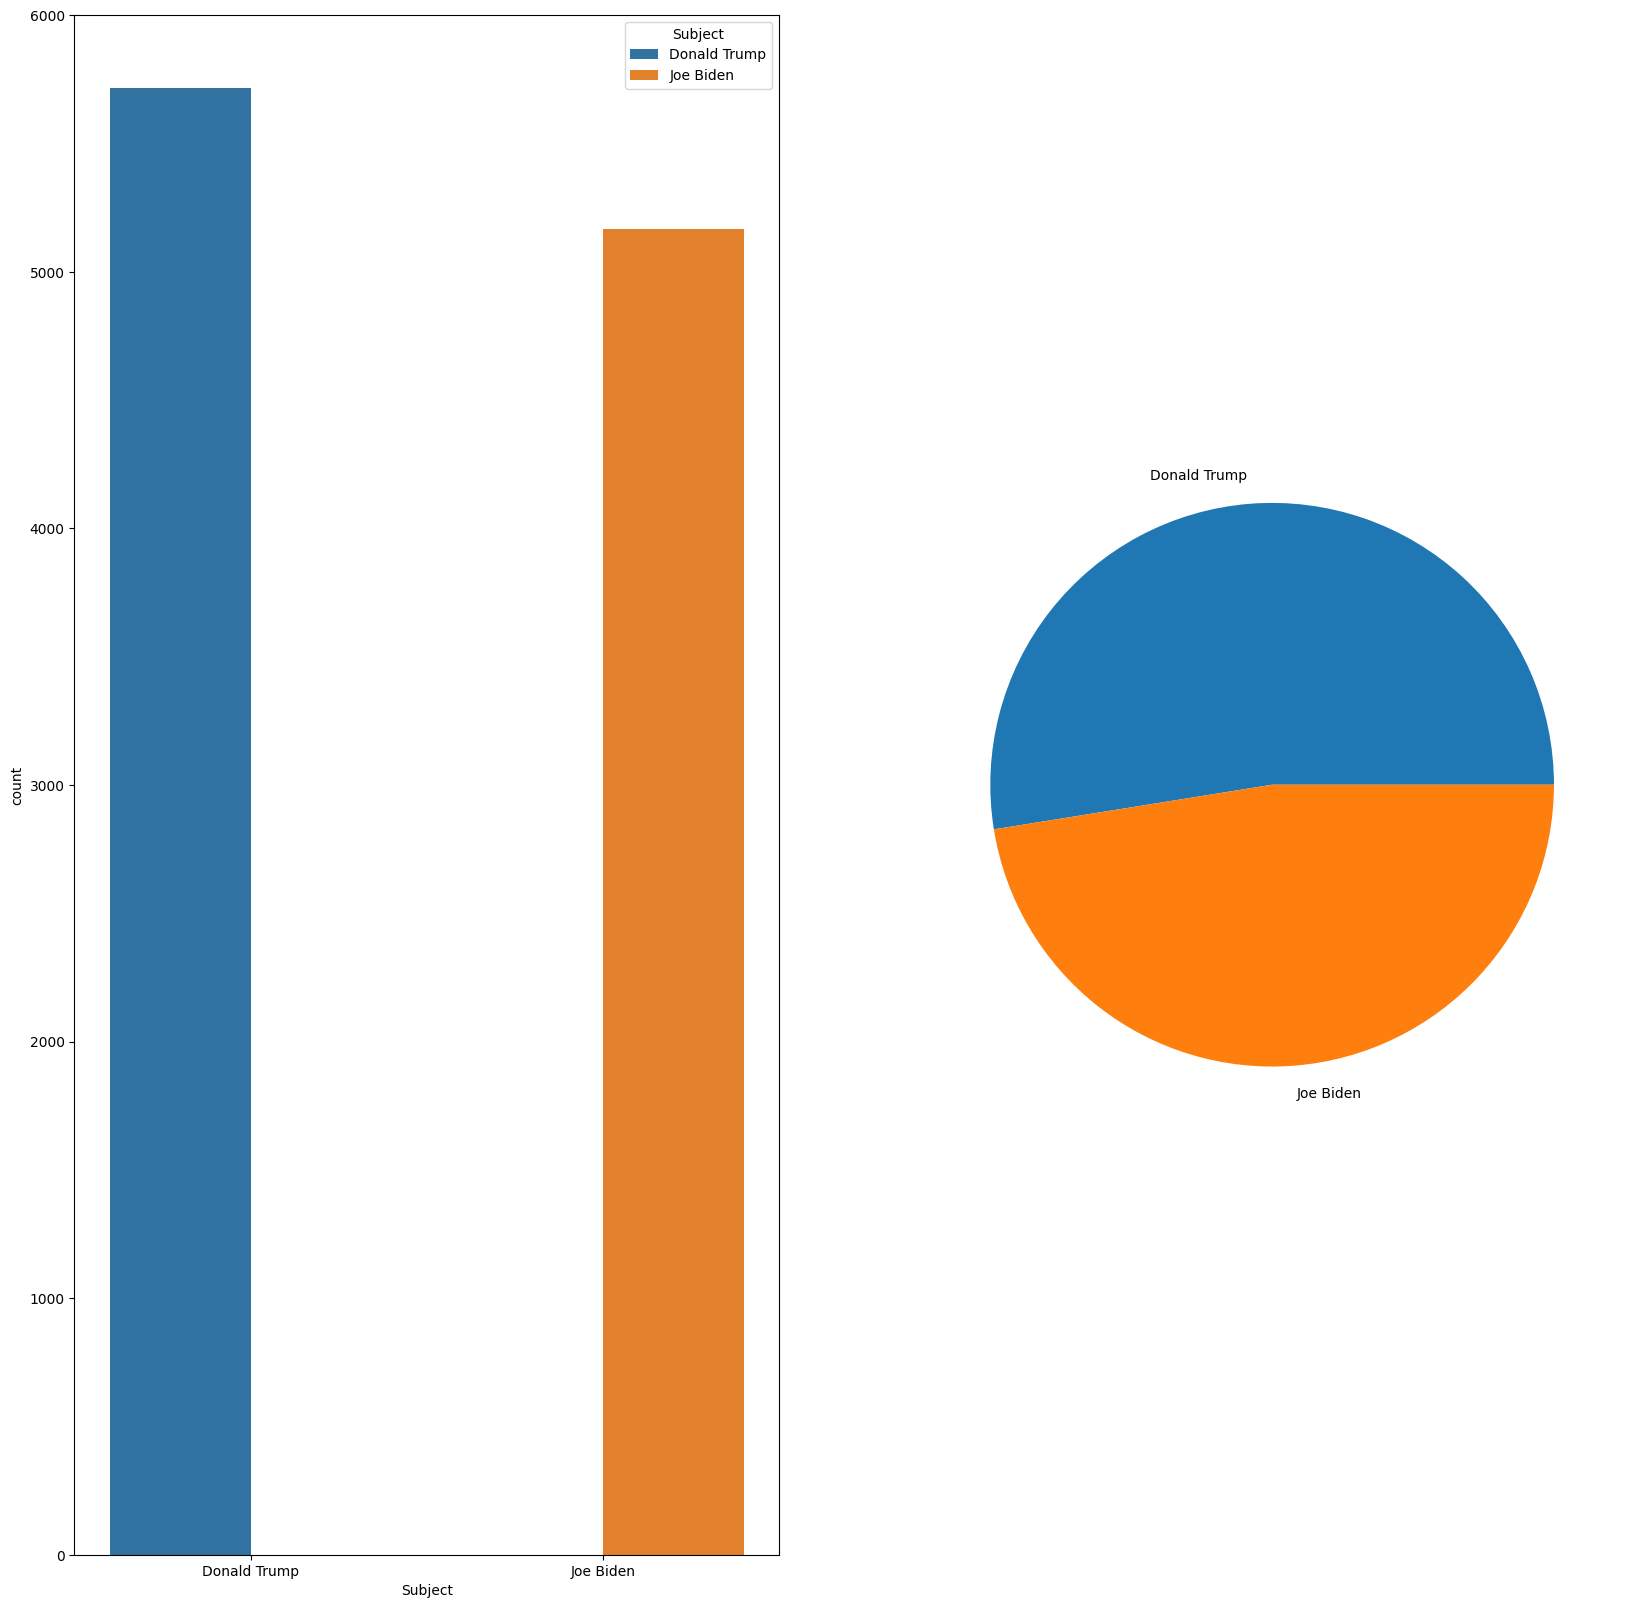

In [159]:
rcParams["figure.figsize"] = 20,20

fir, ax=plt.subplots(nrows=1,ncols=2)
sns.countplot(x="Subject",hue="Subject",data=Election_frame,ax=ax[0])
Election_frame.groupby('Subject').size().plot(kind='pie', ax=ax[1])

<Axes: xlabel='Subject', ylabel='Subject'>

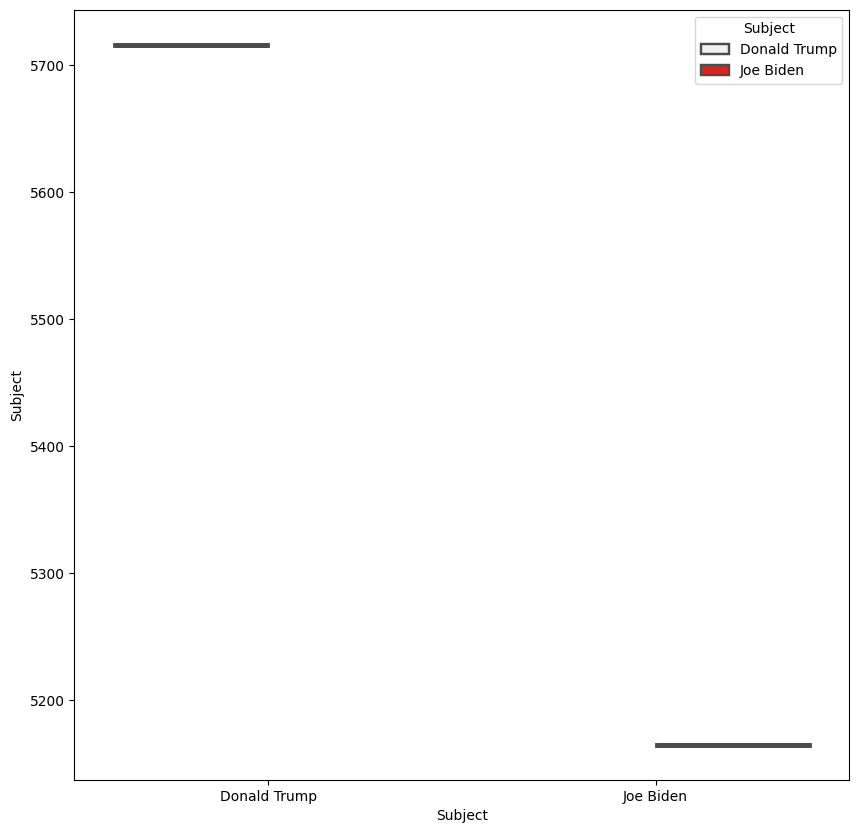

In [160]:
rcParams["figure.figsize"] = 10,10
X=Election_frame.groupby('Subject')['Subject'].transform('size')
sns.boxplot(x="Subject",y=X,data=Election_frame,hue='Subject',color='red',linewidth=3.5)


In [161]:
user_count=Election_frame.groupby('user')['user'].value_counts()

In [162]:
print("The no of user who tweeted",len(user_count))
print("The no of rows the dataset has",Election_frame.shape[0])

The no of user who tweeted 9727
The no of rows the dataset has 10881


In [163]:
user_duplicates = Election_frame[Election_frame.duplicated()]

<Axes: title={'center': 'Duplicate Users'}, ylabel='user'>

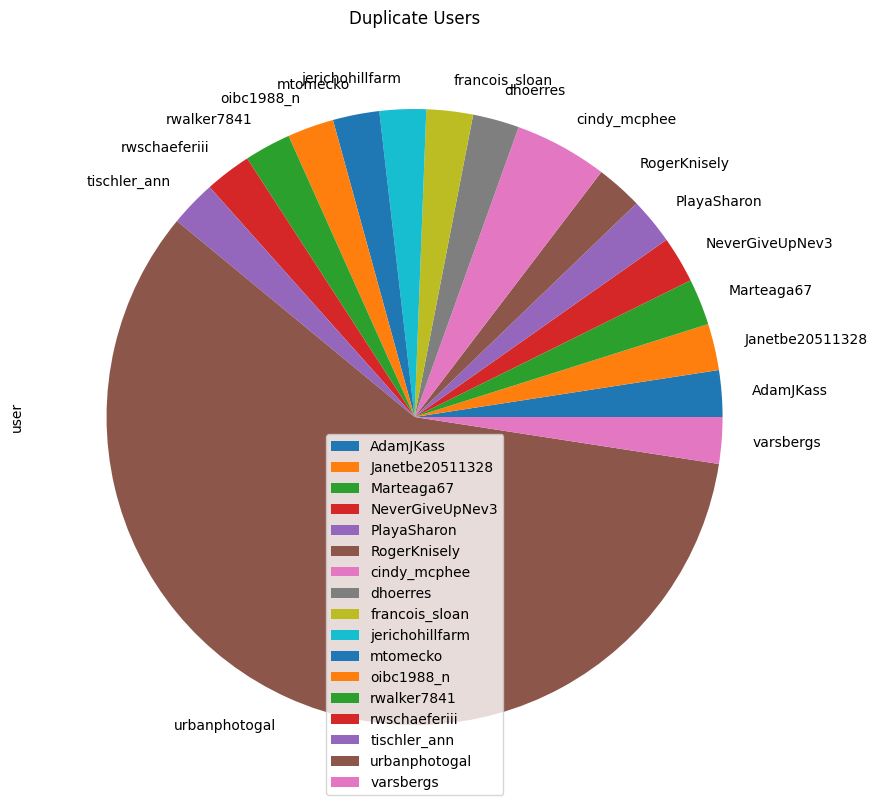

In [164]:
user_duplicates.groupby('user')['user'].size().plot(kind='pie', figsize=(10, 10), legend=True, title='Duplicate Users')


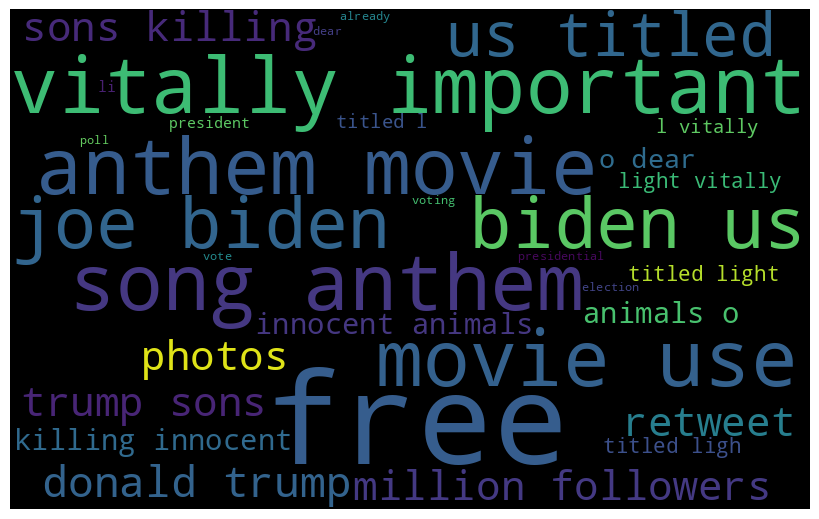

In [165]:
import wordcloud
tweet_words=''
for val in user_duplicates['text']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()
    tweet_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 500,background_color = 'black', min_font_size = 10).generate(tweet_words)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [166]:
Trump_tweets=Election_frame[Election_frame['Subject']=='Donald Trump']
biden_tweets=Election_frame[Election_frame['Subject']=='Joe Biden']

In [167]:
Trump_tweets.head()

,user,Subject,text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi..."
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...


In [168]:
biden_tweets.head()

,user,Subject,text
2928,gmollo1115,Joe Biden,Unfortunately she along with other politicia...
2929,mcritter61,Joe Biden,Let’s talk about the Hunter laptop and such. ...
2930,1kingsbay,Joe Biden,Fun to think about how we learned today that ...
2931,JanedgeJanis,Joe Biden,Larry Kudlow: Joe Biden's economic plan would...
2932,denopotter,Joe Biden,A 64-page document asserting an elaborate con...


In [169]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','', text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*', '',text)
    return text

In [170]:
Trump_tweets['final_text'] = Trump_tweets['text'].apply(lambda x:clean_text(x))
biden_tweets['final_text'] = biden_tweets['text'].apply(lambda x:clean_text(x))

In [171]:
def remove_stopword(x):
    return[w for w in x if not w in stop]

In [172]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already loaded the Trump_tweets DataFrame

# Function to remove stopwords
def remove_stopword(text_list):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text_list if word.lower() not in stop_words]
    return filtered_text

# Preprocess and tokenize the text
Trump_tweets['token_text'] = Trump_tweets['final_text'].apply(lambda x: str(x).split())
Trump_tweets['clean_text'] = Trump_tweets['token_text'].apply(lambda x: remove_stopword(x))

# Count the most common words
top = Counter([item for sublist in Trump_tweets['clean_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

# Apply background gradient to the DataFrame style
temp_styled = temp.style.background_gradient(cmap='Blues')

# Display the styled DataFrame
temp_styled


,Common_words,count
0,donald,2134
1,realdonaldtrump,1944
2,trump,1885
3,biden,530
4,president,503
5,behind,361
6,trumps,357
7,foxnews,321
8,hunter,302
9,oh,282


In [173]:
# Assuming you have the 'temp' DataFrame containing the common words and their counts

fig = px.bar(temp_tweet, x="count", y="Common_words", title='Common Words in Donald Trump Tweets',
             orientation='h', width=700, height=500, color='count')
fig.show()


In [174]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words in Donald trump tweets')
fig.show()

In [175]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import re

# Assuming you have already loaded the biden_tweets DataFrame

# Function to remove stopwords
def remove_stopword(text_list):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text_list if word.lower() not in stop_words]
    return filtered_text

# Preprocess and tokenize the text
biden_tweets['token_text'] = biden_tweets['final_text'].apply(lambda x: re.findall(r'\w+', x.lower()))
biden_tweets['clean_text'] = biden_tweets['token_text'].apply(lambda x: remove_stopword(x))

# Count the most common words
top_tweet = Counter([item for sublist in biden_tweets['clean_text'] for item in sublist])
temp_tweet = pd.DataFrame(top_tweet.most_common(20), columns=['Common_words', 'count'])

# Apply background gradient to the DataFrame style
temp_tweet_styled = temp_tweet.style.background_gradient(cmap='Blues')

# Display the styled DataFrame
temp_tweet_styled


,Common_words,count
0,joebiden,2593
1,biden,2107
2,joe,2080
3,trump,635
4,barackobama,537
5,president,524
6,vote,306
7,hunter,305
8,need,302
9,people,286


In [176]:
fig = px.bar(temp_tweet, x="count", y="Common_words", title='Common Words in Donald Trump Tweets',
             orientation='h', width=700, height=500, color='count')
fig.show()

In [177]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words in joe biden tweets')
fig.show()

In [178]:
Trump_tweets.head()

,user,Subject,text,final_text,token_text,clean_text
0,wheresestela1,Donald Trump,After the confrontation that cost Walter Wall...,after the confrontation that cost walter wall...,"[after, the, confrontation, that, cost, walter...","[confrontation, cost, walter, wallace, jr, lif..."
1,TheFemaleYungin,Donald Trump,"""COVID-19 is still raging. Trump is still lyi...",is still raging trump is still lying,"[is, still, raging, trump, is, still, lying]","[still, raging, trump, still, lying]"
2,KathrynTomashu1,Donald Trump,"Donald Trump Jr.: ""Why aren't they talking ab...",donald trump jr why arent they talking about ...,"[donald, trump, jr, why, arent, they, talking,...","[donald, trump, jr, arent, talking, deaths, oh..."
3,ajserino,Donald Trump,Let’s not forget who created these problems. T...,let’s not forget who created these problems te...,"[let’s, not, forget, who, created, these, prob...","[let’s, forget, created, problems, tell, donal..."
4,SpeakBravely,Donald Trump,There is no greater supporter of Donald Trump...,there is no greater supporter of donald trump...,"[there, is, no, greater, supporter, of, donald...","[greater, supporter, donald, trump, world, mar..."


In [179]:
biden_tweets.head()

,user,Subject,text,final_text,token_text,clean_text
2928,gmollo1115,Joe Biden,Unfortunately she along with other politicia...,unfortunately she along with other politicia...,"[unfortunately, she, along, with, other, polit...","[unfortunately, along, politicians, never, rec..."
2929,mcritter61,Joe Biden,Let’s talk about the Hunter laptop and such. ...,let’s talk about the hunter laptop and such o...,"[let, s, talk, about, the, hunter, laptop, and...","[let, talk, hunter, laptop, oh, wait, biden, b..."
2930,1kingsbay,Joe Biden,Fun to think about how we learned today that ...,fun to think about how we learned today that ...,"[fun, to, think, about, how, we, learned, toda...","[fun, think, learned, today, trump, barr, turk..."
2931,JanedgeJanis,Joe Biden,Larry Kudlow: Joe Biden's economic plan would...,larry kudlow joe bidens economic plan would c...,"[larry, kudlow, joe, bidens, economic, plan, w...","[larry, kudlow, joe, bidens, economic, plan, w..."
2932,denopotter,Joe Biden,A 64-page document asserting an elaborate con...,a document asserting an elaborate conspiracy...,"[a, document, asserting, an, elaborate, conspi...","[document, asserting, elaborate, conspiracy, t..."


In [180]:
from textblob import TextBlob
from textblob import Word
positive_word=[]
negative_word=[]
neutral_word=[]
for word in Trump_tweets['final_text']:
    tokens=word.split()
    for Wr in tokens:
        stat=TextBlob(Wr)
        pol_stat=stat.polarity
        if(pol_stat>0.0):
           positive_word.append(Wr)
        if(pol_stat<0.0):
          negative_word.append(Wr)
        else:
          neutral_word.append(Wr)

In [181]:
print("The no of Positive words in Doland Trump tweets", len(positive_word))
print("The no of Negative words in Doland Trump tweets", len(negative_word))

The no of Positive words in Doland Trump tweets 2871
The no of Negative words in Doland Trump tweets 2084


In [182]:
fig=px.funnel(positive_word, x=pd.Series(positive_word), y=pd.Series(positive_word),color=pd.Series(positive_word),orientation='h',title='positive words of Donal Trump Tweets')
fig.show()

In [183]:
fig=px.funnel(negative_word, x=pd.Series(negative_word), y=pd.Series(negative_word),color=pd.Series(negative_word),orientation='h',title='negative words of Donal Trump Tweets')
fig.show()

In [184]:
from textblob import TextBlob
from textblob import Word
positive_word_biden=[]
negative_word_biden=[]
neutral_word_biden=[]
for word in biden_tweets['final_text']:
    tokens=word.split()
    for Wr in tokens:
        stat=TextBlob(Wr)
        pol_stat=stat.polarity
        if(pol_stat>0.0):
           positive_word_biden.append(Wr)
        if(pol_stat<0.0):
          negative_word_biden.append(Wr)
        else:
          neutral_word_biden.append(Wr)

In [185]:
print("The no of Positive words in joe biden tweets", len(positive_word_biden))
print("The no of Negative words in joe biden tweets", len(negative_word_biden))

The no of Positive words in joe biden tweets 2600
The no of Negative words in joe biden tweets 1711


In [186]:
fig=px.density_contour(positive_word_biden, x=pd.Series(positive_word_biden), y=pd.Series(positive_word_biden),color=pd.Series(positive_word_biden),orientation='h',title='positive words of Joe Biden Tweets')
fig.show()

In [187]:
fig=px.scatter_polar(negative_word_biden, r=pd.Series(negative_word_biden), theta=pd.Series(negative_word_biden),color=pd.Series(negative_word_biden),title='negative words of Joe Biden Tweets',width=800,height=700,opacity=1)
fig.show()

In [188]:
def cleaning_text(inpdata):
    cleanedArticle1 = re.sub(r'[?|$|(),"".@#=><|]!&*/',r' ', inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b',' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +',' ',cleanedArticle5)
    return(cleanedArticle6)


In [189]:
Election_frame['clean_tweets']=Election_frame['text'].apply(cleaning_text)

In [190]:
def Sentiment_Analysis_1(df):
    Inpdata=df['clean_tweets']
    sentiment=[]
    from textblob import TextBlob
    overallsentiment=''
    for word in Inpdata:
        polar=TextBlob(word)
        polar_status=polar.sentiment.polarity
        sentiment.append(polar_status)
    df['Textblob_sentiment']=sentiment
    return(df)

In [191]:
frame=Sentiment_Analysis_1(Election_frame)

In [192]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10881 entries, 0 to 10880
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user                10881 non-null  object 
 1   Subject             10881 non-null  object 
 2   text                10881 non-null  object 
 3   clean_tweets        10881 non-null  object 
 4   Textblob_sentiment  10881 non-null  float64
dtypes: float64(1), object(4)
memory usage: 425.2+ KB


In [193]:
def sentiment(inpdata):
    if(inpdata>0.0):
       return('positive')
    elif(inpdata<0.0):
       return('Negative')
    else:
        return('Nuetral')

In [194]:
frame['Sentiment']=frame['Textblob_sentiment'].apply(sentiment)

In [195]:
frame['Sentiment'].value_counts()

Nuetral     4900
positive    3537
Negative    2444
Name: Sentiment, dtype: int64

In [196]:
Trump=frame[frame['Subject']=='Donald Trump']
Biden=frame[frame['Subject']=='Joe Biden']

In [197]:
Trump['Sentiment'].value_counts()

Nuetral     2560
positive    1734
Negative    1422
Name: Sentiment, dtype: int64

In [198]:
Biden['Sentiment'].value_counts()

Nuetral     2340
positive    1803
Negative    1022
Name: Sentiment, dtype: int64

In [199]:
import plotly.express as px

# Assuming you have the 'Trump' and 'Biden' DataFrames with a 'Sentiment' column

# Plot for Trump's tweets
fig_trump = px.pie(values=Trump['Sentiment'].value_counts(),
                   names=['Neutral', 'Positive', 'Negative'],
                   title="Overall Sentiments of Trump Tweets",
                   hole=0.5,
                   color=['Neutral', 'Positive', 'Negative'])

fig_trump.show()

# Plot for Biden's tweets
fig_biden = px.pie(values=Biden['Sentiment'].value_counts(),
                   names=['Neutral', 'Positive', 'Negative'],
                   title="Overall Sentiments of Biden Tweets",
                   hole=0.5,
                   color=['Neutral', 'Positive', 'Negative'])

fig_biden.show()


In [200]:
fig = px.violin(frame, x='Sentiment', y='Subject',color='Sentiment',hover_name='Sentiment',violinmode='overlay',box=True,orientation='v',title='joe biden V/s Donald Trump')
fig.show()